In [1]:
#import required libraries
import numpy as np
import pandas as pd

In [2]:
# Load the companies dataframe
companies = pd.read_csv('companies.csv', encoding= 'unicode_escape')

In [3]:
# Load the rounds2 dataframe
rounds2 = pd.read_csv('rounds2.csv', encoding= 'unicode_escape')

In [4]:
#get the top 5 rows to check the data of companies
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [5]:
#get the top 5 rows to chekc the data of rounds2
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [6]:
#count of unique companies are present in rounds2
len(rounds2.company_permalink.unique())

90247

In [7]:
#unique companies are present in companies
len(companies.permalink.unique())

66368

In [8]:
#convert permalink column values of companies in lower case to merge with rounds2
companies['permalink'] = companies.permalink.apply(lambda x:x.lower())

In [9]:
#check data of companies after changes in permalink
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [10]:
#convert company_permalink column values of rounds2 in lower case to merge with companies
rounds2['company_permalink'] = rounds2['company_permalink'].apply(lambda x: x.lower())

In [11]:
#check data of rounds2 after changes in company_permalink
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [12]:
#check there any companies in the rounds2 file which are not present in companies
rounds2['company_permalink'].isin(companies['permalink']).value_counts()

True     114942
False         7
Name: company_permalink, dtype: int64

In [13]:
#merge both dataframes in master_frame
master_frame = pd.merge(rounds2, companies,left_on='company_permalink', right_on='permalink', how='inner')

In [14]:
#load data of merged master_frame
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [15]:
#check the observations of master_frame
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114942 entries, 0 to 114941
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114942 non-null  object 
 1   funding_round_permalink  114942 non-null  object 
 2   funding_round_type       114942 non-null  object 
 3   funding_round_code       31139 non-null   object 
 4   funded_at                114942 non-null  object 
 5   raised_amount_usd        94958 non-null   float64
 6   permalink                114942 non-null  object 
 7   name                     114941 non-null  object 
 8   homepage_url             108810 non-null  object 
 9   category_list            111535 non-null  object 
 10  status                   114942 non-null  object 
 11  country_code             106271 non-null  object 
 12  state_code               104003 non-null  object 
 13  region                   104782 non-null  object 
 14  city

In [16]:
master_frame.describe(include="all")

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,114942,114942,114942,31139,114942,9.495800e+04,114942,114941,108810,111535,114942,106271,104003,104782,104785,94422
unique,66363,114942,14,8,5033,NaN,66363,66094,61188,27295,4,137,311,1092,5111,3977
top,/organization/solarflare,/funding-round/b94887934f28e265f7a2b0281bf96364,venture,A,01-01-2014,NaN,/organization/solarflare,Solarflare Communications,http://www.solarflare.com,Biotechnology,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,19,1,55493,14746,779,NaN,19,19,19,8165,90151,72308,26664,19078,7422,4642
mean,NaN,NaN,NaN,NaN,NaN,1.042696e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,1.148218e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,3.225000e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,1.680521e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,7.000000e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
#drop repeated column i.e. permalink
master_frame = master_frame.drop(['permalink'],axis=1)

In [18]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [19]:
#Group By on the basis of Funding Type
groupby_master_frame = master_frame.groupby('funding_round_type')

In [20]:
groupby_master_frame.describe()

raised_amount_usd                                       \
                                  count          mean           std      min   
funding_round_type                                                             
angel                            4860.0  9.586945e+05  7.404397e+06      0.0   
convertible_note                 1447.0  1.453439e+06  8.043846e+06      0.0   
debt_financing                   6682.0  1.704353e+07  2.803204e+08      0.0   
equity_crowdfunding              1228.0  5.383682e+05  1.719329e+06      0.0   
grant                            2124.0  4.300576e+06  2.558742e+07      0.0   
non_equity_assistance              73.0  4.112031e+05  1.771747e+06      0.0   
post_ipo_debt                     152.0  1.687046e+08  6.024738e+08  70000.0   
post_ipo_equity                   628.0  8.218249e+07  4.691889e+08     77.0   
private_equity                   1936.0  7.330859e+07  1.981135e+08      0.0   
product_crowdfunding              386.0  1.363131e+06  4.698380e+06      0.0   
secondary_market                   30.0  7.964963e+07  1.401038e+08   2323.0   
seed                            23602.0  7.197796e+05  2.221772e+06      0.0   
undisclosed                      1582.0  1.924237e+07  1.993238e+08      0.0   
venture                         50228.0  1.174895e+07  8.635207e+07      0.0   

                                                                         
                              25%         50%         75%           max  
funding_round_type                                                       
angel                   150000.00    400000.0   1000000.0  4.945120e+08  
convertible_note         78847.50    272000.0   1000000.0  1.850483e+08  
debt_financing          330484.25   1100000.0   4000000.0  2.127194e+10  
equity_crowdfunding       7000.00    100000.0    395901.0  2.740000e+07  
grant                    50000.00    201684.0   1700000.0  7.500000e+08  
non_equity_assistance    25000.00     60000.0    125000.0  1.500000e+07  
post_ipo_debt          4000000.00  19950000.0  60000000.0  5.800000e+09  
post_ipo_equity        3764794.00  12262852.5  40000000.0  1.066494e+10  
private_equity         5000000.00  20000000.0  75000000.0  4.745460e+09  
product_crowdfunding     40241.75    183915.0    735000.0  5.200000e+07  
secondary_market       5025000.00  32600000.0  84475000.0  6.806116e+08  
seed                     55000.00    275000.0   1000000.0  2.000000e+08  
undisclosed             220000.00   1018680.0   4848804.0  5.000000e+09  
venture                1600901.75   5000000.0  12000000.0  1.760000e+10

In [21]:
#Fileter the data on the basis of suitable Funding Type i.e. venture
master_frame = master_frame[master_frame['funding_round_type'] == 'venture']

In [22]:
master_frame.shape

(55493, 15)

In [23]:
#dispaly the raised amount in 2decimal for readable format
pd.options.display.float_format = '{:.2f}'.format

In [24]:
#create dataframe top9 on the basis of country code by group by
top9 = master_frame.groupby('country_code', sort=True).sum()

In [25]:
#sort the countries on the bases of highest investment 
top9 = top9.sort_values(by="raised_amount_usd",ascending=False)

In [86]:
top9.head(9)

,raised_amount_usd
country_code,
USA,422510842796.00
CHN,39835418773.00
GBR,20245627416.00
IND,14391858718.00
CAN,9583332317.00
FRA,7259536732.00
ISR,6907514579.00
DEU,6346959822.00
JPN,3363676611.00


##### Exclude China because English is not official Langauge there. So we picked 
<b>USA:</b> Top First<br/>
<b>GBR:</b> Top Second<br/>
<b>IND:</b> Top Third<br/>

In [27]:
#filter the dataframe on he basis of 3 top most english countries with highest investment
master_frame = master_frame[(master_frame.country_code == 'USA') | (master_frame.country_code == 'GBR') | (master_frame.country_code == 'IND')]

In [28]:
master_frame.shape

(41667, 15)

In [29]:
master_frame.head(10)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
5,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,nan,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.00,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.00,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
12,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.00,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
22,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.00,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012
28,/organization/10-minutes-with,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,A,09-10-2014,4000000.00,10 Minutes With,http://10minuteswith.com,Education,operating,GBR,H9,London,London,01-01-2013
33,/organization/1000lookz,/funding-round/e07f6e580046d00c7aeb33fafb9d90a3,venture,NaN,22-07-2013,nan,1000Lookz,http://1000lookz.com,Beauty,operating,IND,25,Chennai,Chennai,01-01-2008
34,/organization/1000memories,/funding-round/502bd0e50c27616995e4bdad24605ef8,venture,A,16-02-2011,2520000.00,1000memories,http://1000memories.com,Curated Web,acquired,USA,CA,SF Bay Area,San Francisco,01-07-2010


In [30]:
#check the count of countries' investments
master_frame.country_code.value_counts()

USA    38372
GBR     2303
IND      992
Name: country_code, dtype: int64

In [31]:
#check the values of category list
master_frame['category_list'].value_counts()

Biotechnology                                                    4728
Software                                                         3391
Health Care                                                      1258
Clean Technology                                                 1090
Enterprise Software                                              1053
                                                                 ... 
Fantasy Sports|Games|Social Games|Social Network Media|Sports       1
Artificial Intelligence|Natural Language Processing|Software        1
Developer APIs|Developer Tools|Web Development                      1
E-Commerce|Mobile|Retail                                            1
Chat|Enterprise Software|Messaging|Mobile Enterprise                1
Name: category_list, Length: 8377, dtype: int64

In [32]:
#check any null value rows exist in dataframe
master_frame[master_frame.category_list.isnull()]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
528,/organization/3pl-central,/funding-round/895e7a284b35bdf86103e52db8a630a6,venture,NaN,03-12-2015,17500000.00,3PL Central,http://3plcentral.com/,NaN,operating,USA,CA,Los Angeles,Manhattan Beach,01-01-2006
782,/organization/60frames-entertainment,/funding-round/60daf91c26dd8f3bd8cbb7d9c28ba9b6,venture,A,02-08-2007,3500000.00,60Frames Entertainment,http://60frames.com/,NaN,closed,USA,CA,Los Angeles,Beverly Hills,NaN
798,/organization/6ep,/funding-round/1b9514ecc790127b64c1bf1eefd2ce94,venture,NaN,01-07-2014,nan,6EP,http://6ep.co.uk/,NaN,operating,GBR,H3,Leeds,Leeds,NaN
1430,/organization/accelerator-corp,/funding-round/215f281607a54b9d5fc848b5c74ef9e7,venture,NaN,22-05-2003,15000000.00,Accelerator Corp.,http://www.acceleratorcorp.com,NaN,operating,USA,WA,Seattle,Seattle,01-01-2003
1431,/organization/accelerator-corp,/funding-round/bdca470b4ae21074297ad9da55e11dbf,venture,C,03-08-2007,22500000.00,Accelerator Corp.,http://www.acceleratorcorp.com,NaN,operating,USA,WA,Seattle,Seattle,01-01-2003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112397,/organization/xshares-group-llc,/funding-round/078473e9b20f414cf1a4ffada366eb83,venture,NaN,02-02-2007,10000000.00,XShares Group LLC,http://www.xsharesadvisors.com,NaN,operating,USA,NY,New York City,New York,NaN
112499,/organization/xytrans,/funding-round/72c6ca0c4590f3c4ae6500fb81746649,venture,E,29-11-2006,nan,Xytrans,NaN,NaN,closed,USA,FL,Orlando,Orlando,01-01-2000
112779,/organization/yellowjacket,/funding-round/e8a4037e2a35175aac61cd3c3153eb7e,venture,NaN,09-08-2007,1250000.00,YellowJacket,http://www.yjenergy.com,NaN,closed,USA,NY,New York City,New York,NaN
112945,/organization/yodel,/funding-round/cd2b175af6d20770079461335d2cf44e,venture,A,02-06-2005,8000000.00,Yodel,NaN,NaN,closed,USA,CA,SF Bay Area,San Francisco,NaN


In [33]:
#drop the null value rows of category list
master_frame = master_frame[~master_frame.category_list.isnull()]

In [34]:
#convert category_listinto string dtype
master_frame.category_list = master_frame.category_list.astype(str) 

In [35]:
#split the prmary sector of category_list
master_frame['category_list'] = master_frame['category_list'].apply(lambda x: x.split("|",1)[0] if type(x) == str else x)

In [36]:
#chekc the splited values of category_list
master_frame.category_list.value_counts()

Biotechnology            6012
Software                 3505
Advertising              1943
Health Care              1639
Enterprise Software      1631
                         ... 
Cosmetic Surgery            1
Reputation                  1
Material Science            1
Government Innovation       1
Mass Customization          1
Name: category_list, Length: 577, dtype: int64

In [37]:
master_frame.head(10)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan,:Qounter,http://www.qounter.com,Application Platforms,operating,USA,DE,DE - Other,Delaware City,04-09-2014
5,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,nan,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.00,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.00,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
12,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.00,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
22,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.00,1 Mainstream,http://www.1mainstream.com,Apps,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012
28,/organization/10-minutes-with,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,A,09-10-2014,4000000.00,10 Minutes With,http://10minuteswith.com,Education,operating,GBR,H9,London,London,01-01-2013
33,/organization/1000lookz,/funding-round/e07f6e580046d00c7aeb33fafb9d90a3,venture,NaN,22-07-2013,nan,1000Lookz,http://1000lookz.com,Beauty,operating,IND,25,Chennai,Chennai,01-01-2008
34,/organization/1000memories,/funding-round/502bd0e50c27616995e4bdad24605ef8,venture,A,16-02-2011,2520000.00,1000memories,http://1000memories.com,Curated Web,acquired,USA,CA,SF Bay Area,San Francisco,01-07-2010


In [38]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41283 entries, 0 to 114929
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company_permalink        41283 non-null  object 
 1   funding_round_permalink  41283 non-null  object 
 2   funding_round_type       41283 non-null  object 
 3   funding_round_code       22437 non-null  object 
 4   funded_at                41283 non-null  object 
 5   raised_amount_usd        38803 non-null  float64
 6   name                     41283 non-null  object 
 7   homepage_url             39404 non-null  object 
 8   category_list            41283 non-null  object 
 9   status                   41283 non-null  object 
 10  country_code             41283 non-null  object 
 11  state_code               41205 non-null  object 
 12  region                   41113 non-null  object 
 13  city                     41113 non-null  object 
 14  founded_at           

In [39]:
# Load the mapping dataframe
mapping = pd.read_csv('mapping.csv',encoding= 'unicode_escape')

In [40]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [41]:
#check any null value in mapping df
mapping.isnull().sum()

category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [42]:
#drop np values from mapping
mapping.dropna(inplace=True)

In [43]:
#check againg null value present or not
mapping.isnull().sum()

category_list                              0
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [44]:
#convert columns as value for melt function to convert wide mapping df to long_df
value_vars = list(mapping.columns[1:])

In [45]:
#take the diff of value_vars with mapping df which columns we don't want to change
id_vars = list(np.setdiff1d(mapping.columns,value_vars))

In [46]:
id_vars

['category_list']

In [47]:
#convert mapping wide df to long_df
long_df = pd.melt(mapping,id_vars,value_vars)

In [48]:
long_df

,category_list,variable,value
0,3D,Automotive & Sports,0
1,3D Printing,Automotive & Sports,0
2,3D Technology,Automotive & Sports,0
3,Accounting,Automotive & Sports,0
4,Active Lifestyle,Automotive & Sports,0
...,...,...,...
6178,Wholesale,"Social, Finance, Analytics, Advertising",0
6179,Wine And Spirits,"Social, Finance, Analytics, Advertising",0
6180,Wireless,"Social, Finance, Analytics, Advertising",0
6181,Women,"Social, Finance, Analytics, Advertising",0


In [49]:
#take oly those rows which have value 1
long_df = long_df[long_df['value'] == 1]

In [50]:
#drop the value column from long_df
long_df = long_df.drop('value',axis=1)

In [51]:
long_df

,category_list,variable
7,Adventure Travel,Automotive & Sports
13,Aerospace,Automotive & Sports
44,Auto,Automotive & Sports
45,Automated Kiosk,Automotive & Sports
46,Automotive,Automotive & Sports
...,...,...
6112,Social Recruiting,"Social, Finance, Analytics, Advertising"
6113,Social Television,"Social, Finance, Analytics, Advertising"
6114,Social Travel,"Social, Finance, Analytics, Advertising"
6125,Stock Exchanges,"Social, Finance, Analytics, Advertising"


In [52]:
#rename the column from variable to primary sector
long_df = long_df.rename(columns = {'variable':'primary sector'}) 

In [53]:
long_df

,category_list,primary sector
7,Adventure Travel,Automotive & Sports
13,Aerospace,Automotive & Sports
44,Auto,Automotive & Sports
45,Automated Kiosk,Automotive & Sports
46,Automotive,Automotive & Sports
...,...,...
6112,Social Recruiting,"Social, Finance, Analytics, Advertising"
6113,Social Television,"Social, Finance, Analytics, Advertising"
6114,Social Travel,"Social, Finance, Analytics, Advertising"
6125,Stock Exchanges,"Social, Finance, Analytics, Advertising"


In [54]:
#merge long mapping df with master frame to combine primary sector
master_frame = pd.merge(master_frame, long_df,left_on='category_list', right_on='category_list', how='inner')

In [55]:
master_frame.sample(10)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary sector
11878,/organization/quark-pharmaceuticals,/funding-round/173c5feea3812ba817d2a04cf3b1dcba,venture,NaN,01-06-2010,10000000.00,Quark Pharmaceuticals,http://www.quarkpharma.com,Biotechnology,operating,USA,CA,SF Bay Area,Fremont,01-12-1994,Cleantech / Semiconductors
27707,/organization/instagram,/funding-round/5c47fc2e265598256881a2a4ea9d78a9,venture,A,02-02-2011,7000000.00,Instagram,http://instagram.com,Mobile,acquired,USA,CA,SF Bay Area,San Francisco,02-06-2010,"News, Search and Messaging"
21764,/organization/voxy,/funding-round/03acc6e5c6cb8b39f2b6b54d40d24dfc,venture,A,10-07-2011,2900000.00,Voxy,http://www.voxy.com,EdTech,operating,USA,NY,New York City,New York,17-02-2010,Others
37911,/organization/doubledutch,/funding-round/f7b82406f005dd0e8292a9bfd4678edd,venture,E,12-08-2015,45000000.00,DoubleDutch,http://doubledutch.me,Enterprise Application,operating,USA,CA,SF Bay Area,San Francisco,01-01-2011,Others
20159,/organization/craftsvilla,/funding-round/f29f97105736a6de8e06e952ea55d450,venture,A,29-06-2012,1500000.00,Craftsvilla,http://www.craftsvilla.com,E-Commerce,operating,IND,16,Mumbai,Mumbai,01-01-2011,Others
7697,/organization/amidebio,/funding-round/d5d66574bc5d4965585c507001af1233,venture,NaN,12-01-2015,279287.00,AmideBio,http://AmideBio.com,Biotechnology,operating,USA,CO,Denver,Aurora,01-01-2009,Cleantech / Semiconductors
18531,/organization/pyron-solar,/funding-round/b7a35f545671baa05db1f6f48f9b1981,venture,A,09-09-2008,nan,Pyron Solar,http://www.pyronsolar.com,Clean Technology,operating,USA,CA,San Diego,San Diego,01-01-2004,Cleantech / Semiconductors
15545,/organization/adspace-networks,/funding-round/f09d21ff09def9ca5299a3fb4452f647,venture,NaN,11-05-2010,75000.00,Adspace Networks,http://www.adspacenetworks.com/index2.php,Advertising,operating,USA,NY,New York City,New York,01-01-1998,"Social, Finance, Analytics, Advertising"
33095,/organization/health-elt,/funding-round/4f4f6a79da934e9a5ea67e8e48efa699,venture,NaN,18-12-2013,375000.00,Health: Elt,http://healthelt.com,Hospitality,operating,USA,TX,Dallas,Dallas,01-01-2013,Others
18405,/organization/omniguide,/funding-round/f6b5f0421d0429659c9ab6bbcd2585f9,venture,NaN,28-08-2012,35000000.00,OmniGuide,http://www.omni-guide.com,Clean Technology,operating,USA,MA,Boston,Cambridge,01-01-2003,Cleantech / Semiconductors


In [56]:
#rename the column from category_list to main_sector
master_frame = master_frame.rename(columns = {'category_list':'main_sector'}) 

In [57]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,main_sector,status,country_code,state_code,region,city,founded_at,primary sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Entertainment
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.00,90min,http://www.90min.com,Media,operating,GBR,H9,London,London,01-01-2011,Entertainment
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.00,90min,http://www.90min.com,Media,operating,GBR,H9,London,London,01-01-2011,Entertainment
3,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,NaN,26-03-2014,18000000.00,90min,http://www.90min.com,Media,operating,GBR,H9,London,London,01-01-2011,Entertainment
4,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.00,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,Entertainment


In [58]:
#create D1 for country USA which as top English speaking country
D1 = master_frame[master_frame['country_code'] == 'USA']

In [59]:
D1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35421 entries, 4 to 38430
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company_permalink        35421 non-null  object 
 1   funding_round_permalink  35421 non-null  object 
 2   funding_round_type       35421 non-null  object 
 3   funding_round_code       19062 non-null  object 
 4   funded_at                35421 non-null  object 
 5   raised_amount_usd        33526 non-null  float64
 6   name                     35421 non-null  object 
 7   homepage_url             33714 non-null  object 
 8   main_sector              35421 non-null  object 
 9   status                   35421 non-null  object 
 10  country_code             35421 non-null  object 
 11  state_code               35405 non-null  object 
 12  region                   35381 non-null  object 
 13  city                     35381 non-null  object 
 14  founded_at            

In [60]:
#create D2 for country GBR which as top Second English speaking country
D2 = master_frame[master_frame['country_code'] == 'GBR']

In [61]:
D2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2120 entries, 1 to 38418
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company_permalink        2120 non-null   object 
 1   funding_round_permalink  2120 non-null   object 
 2   funding_round_type       2120 non-null   object 
 3   funding_round_code       1061 non-null   object 
 4   funded_at                2120 non-null   object 
 5   raised_amount_usd        1916 non-null   float64
 6   name                     2120 non-null   object 
 7   homepage_url             2031 non-null   object 
 8   main_sector              2120 non-null   object 
 9   status                   2120 non-null   object 
 10  country_code             2120 non-null   object 
 11  state_code               2064 non-null   object 
 12  region                   1997 non-null   object 
 13  city                     1997 non-null   object 
 14  founded_at             

In [62]:
#create D3 for country IND which as top Third English speaking country
D3 = master_frame[master_frame['country_code'] == 'IND']

In [63]:
D3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 890 entries, 0 to 38410
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company_permalink        890 non-null    object 
 1   funding_round_permalink  890 non-null    object 
 2   funding_round_type       890 non-null    object 
 3   funding_round_code       546 non-null    object 
 4   funded_at                890 non-null    object 
 5   raised_amount_usd        745 non-null    float64
 6   name                     890 non-null    object 
 7   homepage_url             877 non-null    object 
 8   main_sector              890 non-null    object 
 9   status                   890 non-null    object 
 10  country_code             890 non-null    object 
 11  state_code               884 non-null    object 
 12  region                   884 non-null    object 
 13  city                     884 non-null    object 
 14  founded_at              

In [64]:
#Total amount of investment for C1
D1.raised_amount_usd.sum()

392237581395.0

In [65]:
#Total amount of investment for C2
D2.raised_amount_usd.sum()

18924390319.0

In [66]:
#Total amount of investment for C3
D3.raised_amount_usd.sum()

13537981235.0

In [67]:
#sort values by highest investment in C1
D1 = D1.sort_values(by="raised_amount_usd",ascending = False)

In [68]:
#check the count of Top sectors of C1
D1['main_sector'].value_counts()

Biotechnology          5700
Software               3230
Advertising            1805
Health Care            1573
Enterprise Software    1541
                       ... 
Material Science          1
Enterprise Security       1
Edutainment               1
iOS                       1
Law Enforcement           1
Name: main_sector, Length: 507, dtype: int64

In [69]:
#check the count of Top sectors of C2
D2['main_sector'].value_counts()

Biotechnology       289
Software            225
Advertising         116
E-Commerce          109
Clean Technology     93
                   ... 
Alumni                1
Defense               1
Web Design            1
Dental                1
Gps                   1
Name: main_sector, Length: 213, dtype: int64

In [70]:
#check the count of Top sectors of C3
D3['main_sector'].value_counts()

E-Commerce                  112
Software                     50
Education                    39
Curated Web                  38
Mobile                       28
                           ... 
Location Based Services       1
Databases                     1
Communities                   1
FinTech                       1
General Public Worldwide      1
Name: main_sector, Length: 167, dtype: int64

In [71]:
D1[D1['main_sector'] == 'Software']

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,main_sector,status,country_code,state_code,region,city,founded_at,primary sector
3102,/organization/surveymonkey,/funding-round/b2769574c2855e34298aeeaa7a93eb9c,venture,NaN,15-12-2014,250000000.00,SurveyMonkey,http://www.surveymonkey.com,Software,operating,USA,CA,SF Bay Area,Palo Alto,01-01-1999,Others
3086,/organization/stream-global-services,/funding-round/dd076eae946cc834042e8a8d86545ba0,venture,NaN,01-10-2009,185083586.00,Stream Global Services,http://stream.com,Software,acquired,USA,MN,Minneapolis,Eagan,01-01-1992,Others
1256,/organization/fieldglass,/funding-round/1427fdbf4a0d629d60a8d18096bbce6c,venture,NaN,26-10-2010,162287501.00,Fieldglass,http://www.fieldglass.com,Software,acquired,USA,IL,Chicago,Chicago,12-11-1999,Others
1758,/organization/k2,/funding-round/edd23be56c36c02b4efe3ef182791917,venture,C,03-04-2015,153496208.00,K2,http://www.k2.com,Software,operating,USA,WA,Seattle,Bellevue,01-01-2000,Others
2571,/organization/qualtrics,/funding-round/05e58a54245390600c96f53803416bd9,venture,B,24-09-2014,150000000.00,Qualtrics,http://www.qualtrics.com,Software,operating,USA,UT,Salt Lake City,Provo,01-01-2002,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3555,/organization/wranggle,/funding-round/7d34f07fac6b227cb1f5fcebf7915f01,venture,NaN,26-01-2015,nan,Wranggle,https://wranggle.com/,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2011,Others
3588,/organization/zaplee,/funding-round/d58a148cc611778c4aff4963d59a411f,venture,NaN,14-08-2014,nan,Zaplee,http://www.zaplee.com,Software,operating,USA,IL,Chicago,Chicago,01-06-2010,Others
3593,/organization/zensight,/funding-round/dd83eff2e497e976a98a9535ab637cd8,venture,NaN,13-01-2015,nan,Zensight,http://www.zensight.co/,Software,operating,USA,MA,Boston,Cambridge,01-01-2014,Others
3594,/organization/zephyr,/funding-round/575c95dda29812af62cb341b306bd3a6,venture,A,15-05-2008,nan,Zephyr,http://www.getzephyr.com,Software,operating,USA,CA,SF Bay Area,Newark,01-04-2007,Others


In [72]:
#sort values by highest investment in C2
D2 = D2.sort_values(by="raised_amount_usd",ascending = False)

In [73]:
D2[D2['main_sector'] == 'Software'].head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,main_sector,status,country_code,state_code,region,city,founded_at,primary sector
388,/organization/avecto,/funding-round/55fc2f58248a76d0a4fbc3165c05f299,venture,NaN,02-12-2015,49000000.00,Avecto,http://www.avecto.com,Software,operating,GBR,I2,Manchester,Manchester,01-01-2008,Others
2438,/organization/picsel-technologies-limted,/funding-round/000d33f7dfd1d9cb2a6f67754ddc4580,venture,C,12-02-2007,46500000.00,Picsel Technologies,http://www.picsel.com,Software,operating,GBR,V2,Glasgow,Glasgow,01-01-1998,Others
1093,/organization/ecommera,/funding-round/3e049cff9e4c754cb17806332b5d0f75,venture,C,23-02-2014,41000000.00,OrderDynamics,http://www.orderdynamics.com/,Software,operating,GBR,H9,London,London,01-01-2007,Others
1333,/organization/gameaccount-network,/funding-round/6bd8e18ff86704d52368f7daf0158752,venture,NaN,20-11-2013,33638582.00,GameAccount Network,http://gameaccountnetwork.com,Software,operating,GBR,H9,London,London,01-01-2002,Others
2953,/organization/siteminder,/funding-round/b3384545cc270a4d81268e0b9782af7c,venture,B,14-01-2014,30000000.00,SiteMinder,http://siteminder.com,Software,operating,GBR,H9,London,London,NaN,Others


In [74]:
#sort values by highest investment in C3
D3 = D3.sort_values(by="raised_amount_usd",ascending = False)

In [75]:
#check the highest country value
D3[D3['main_sector'] == 'Software'].head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,main_sector,status,country_code,state_code,region,city,founded_at,primary sector
1494,/organization/igate-patni-computers,/funding-round/c6d32837bd49cafa000b56e61b7a4f82,venture,NaN,13-09-2002,100000000.00,iGATE/Patni Computers,http://www.igate.com/,Software,acquired,IND,16,IND - Other,Andheri,01-01-1978,Others
1266,/organization/financial-software-systems,/funding-round/69736b4c40ae81c422d033ecf6b9f5fc,venture,D,14-10-2014,57000000.00,Financial Software Systems,http://www.fsstech.com/,Software,operating,IND,25,Chennai,Chennai,01-01-1991,Others
1427,/organization/happiest-minds,/funding-round/584bb68d9de31259d738afe0b2069f4d,venture,A,16-11-2011,45000000.00,Happiest Minds Technolgoies,http://www.happiestminds.com,Software,operating,IND,19,Bangalore,Bangalore,29-08-2011,Others
654,/organization/ce-info-systems,/funding-round/34f0c5e26262096a3d19de3f47a39af3,venture,B,09-08-2007,25000000.00,CE Info Systems,http://www.mappls.com,Software,operating,IND,7,New Delhi,New Delhi,01-01-1992,Others
1568,/organization/infrasoft-technologies,/funding-round/9c4eeb31072fa5ea9d6e2697faa61c30,venture,NaN,11-07-2007,24800000.00,Infrasoft Technologies,http://www.infrasofttech.com,Software,ipo,IND,16,Mumbai,Mumbai,01-01-1994,Others


In [76]:
#import matplot library to plot graph
import matplotlib.pyplot as plt

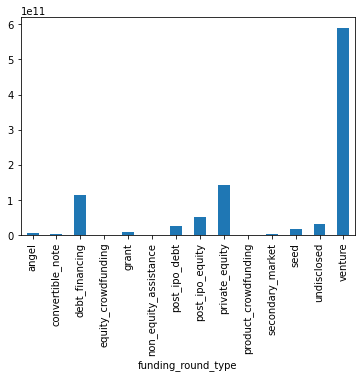

In [77]:
#plot the graph for funding type with raised_amount_usd
groupby_master_frame['raised_amount_usd'].sum().plot.bar()
plt.show()

In [78]:
#filter top 9 countries
top9_graph = top9.head(9)

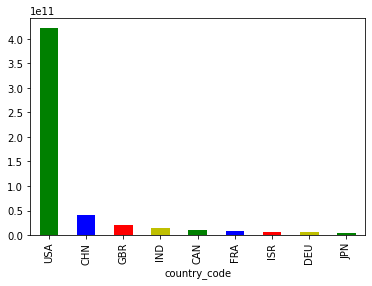

In [79]:
#plot a graph for country with raised_amount_usd
top9_graph['raised_amount_usd'].plot.bar(color=['g', 'b', 'r','y'])
plt.show()

In [80]:
#get data of c1 country with top 3 sectors
main_df = D1[D1['main_sector'].isin(['Biotechnology','Software','Advertising'])]

In [81]:
#get data of c2 country with top 3 sectors and append in above df
main_df = main_df.append(D2[D2['main_sector'].isin(['Biotechnology','Software','Advertising'])])

In [82]:
#get data of c3 country with top 3 sectors and append in above df
main_df = main_df.append(D3[D3['main_sector'].isin(['E-Commerce','Software','Education'])])

In [83]:
#final df with top 3 countries and top3 sectors
main_df

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,main_sector,status,country_code,state_code,region,city,founded_at,primary sector
16463,/organization/mediavast,/funding-round/07e345b61646adffc65946de6a1c88d9,venture,B,30-06-2003,4700000000.00,MediaVast,NaN,Advertising,acquired,USA,NY,New York City,New York,01-01-1999,"Social, Finance, Analytics, Advertising"
16088,/organization/groupon,/funding-round/9443ef2dbda93a64b1c3c6f7d14295d8,venture,D,11-01-2011,950000000.00,Groupon,http://www.groupon.com,Advertising,ipo,USA,IL,Chicago,Chicago,11-11-2008,"Social, Finance, Analytics, Advertising"
10383,/organization/juno-therapeutics,/funding-round/f93ba64f2e858105c47ee4901dc71d74,venture,NaN,14-07-2015,849803496.00,Juno Therapeutics,http://junotherapeutics.com,Biotechnology,ipo,USA,WA,Seattle,Seattle,01-01-2013,Cleantech / Semiconductors
11872,/organization/quantrx-biomedical,/funding-round/773952f16706442262e83b2f5cef9322,venture,NaN,14-08-2009,406039700.00,QuantRx Biomedical,http://quantrx.com/underconstruction.htm,Biotechnology,operating,USA,OR,"Portland, Oregon",Tualatin,01-01-1986,Cleantech / Semiconductors
10482,/organization/kosmos-biotherapeutics,/funding-round/236e6456e4b197776581bfdd639858a0,venture,A,04-04-2010,319000000.00,Kosmos Biotherapeutics,NaN,Biotechnology,operating,USA,MA,Boston,Cambridge,NaN,Cleantech / Semiconductors
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20827,/organization/shop-your-world,/funding-round/3f8035d56ff2ef59e09d92dae100290f,venture,A,18-09-2013,nan,ShopYourWorld,http://Shopyourworld.com,E-Commerce,operating,IND,16,Mumbai,Mumbai,01-01-2010,Others
20856,/organization/snapdeal,/funding-round/a7d68de1f3ee73de7993e85f634ec196,venture,C,06-06-2013,nan,Snapdeal,http://www.snapdeal.com,E-Commerce,operating,IND,7,New Delhi,New Delhi,01-01-2010,Others
20860,/organization/snapdeal,/funding-round/e5d38d7d16be038c89c2fed2755f1bf8,venture,NaN,27-08-2014,nan,Snapdeal,http://www.snapdeal.com,E-Commerce,operating,IND,7,New Delhi,New Delhi,01-01-2010,Others
20877,/organization/stayzilla,/funding-round/4971fbd906309f534ba6298dd4a12d03,venture,A,03-10-2013,nan,Stayzilla,http://stayzilla.com,E-Commerce,operating,IND,25,Chennai,Chennai,01-01-2005,Others


In [84]:
#import library to plot graph b/w country and primary sector
import seaborn as sns

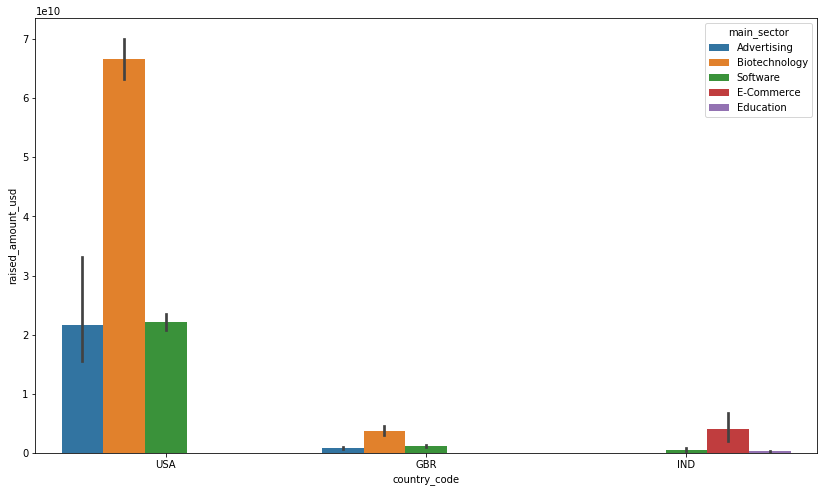

In [85]:
#change the dimension of plot
fig_dims = (14, 8)
#assign dimention to plot
fig, ax = plt.subplots(figsize=fig_dims)
#draw a plot
sns.barplot(x="country_code", y="raised_amount_usd", hue="main_sector", ax=ax, data=main_df, estimator=sum)
plt.show()